In [30]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X 

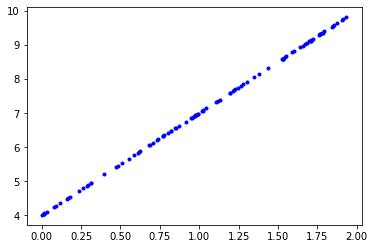

In [31]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

In [32]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.],
       [3.]])

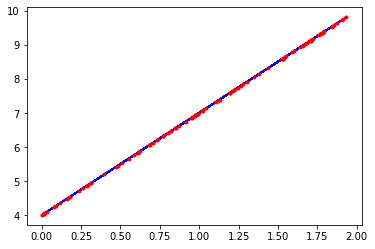

In [33]:
h = X_b.dot(theta_best)

plt.plot(X, h, 'b-')
plt.plot(X, y, 'r.')
plt.show()

In [34]:
n_epochs = 50
m=100
t0, t1 = 5, 50

theta = np.random.randn(2, 1)

def learning_schedule(t):
    return t0/(t+t1)

for epoch in range(n_epochs):
    for j in range(m):
        i = np.random.randint(m)
        xi = X_b[i:i+1]
        yi = y[i:i+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        
theta

array([[3.99821293],
       [3.00148219]])

# Logistic Regression

In [35]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [36]:
import numpy as np

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [37]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
np.unique(iris["target"], return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

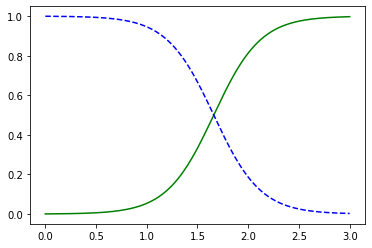

In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")